# Lab 2: Linear Regression using polynomials

## Goals
In this lab, you will:
- learn how to use polynomials to fit more complex models using linear regression.

<a name="toc_40291_2"></a>
# Problem Statement
As we saw in the previous lab, [linear regression](https://www.ibm.com/topics/linear-regression) analysis is used to predict the value of a variable (*y*) based on the value of another variable (*x*). The variable you want to predict is called the dependent variable (*y*). The variable you are using to predict the other variable's value is called the independent variable (*x*).

This form of analysis estimates the coefficients of a linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values.



---



In this lab we are going to see how this algorithm works with a simple example, using the Python library "numpy", especifically the ["polyfit"](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) and the ["poly1d"](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html) functions.

First, we are going to import some libraries and functions that we will use:


*   **Numpy**, that allows us to work with arrays and create the models
*   The **"pyplot"** package from Matplotlib, that will allow us to plot some results

In [18]:
import numpy as np
import matplotlib.pyplot as plt

Then we define some functions that will be useful to plot the results of the models we will create

In [19]:
# Plot a figure with the data and the regression function
def plot_data(xTrain, yTrain, model, name, xVal = None, yVal = None, validation = False):
  polyline = np.linspace(1.9, 13, 100)

  fig, ax = plt.subplots(figsize=(10, 7))
  plt.scatter(xTrain, yTrain, s=100, c = 'b')
  if validation:
    plt.scatter(xVal, yVal, s=100, c = 'orange')
  plt.rcParams.update({'font.size': 14})

  ax.set_xlabel('years(x)')
  ax.set_ylabel('price(y)')
  ax.set_title('price for used cars '+ name)

  ax.axis([1.5, 13, 0, 12000])
  ax.grid(True);
  plt.plot(polyline, model(polyline))


## DATA

In this case, we are presented with a simple problem: the price of used cars along the years. Cars are then presumed to be in a linear relationship with how old it is. We have two datasets:


*   Training data, where **xTrain** contains a single feature (car age) for the training dataset, and **yTrain** contains the ground truth labels of these samples, in this case the price of the car. This dataset will be used to fit the models we will train.
*   Validation data, where **xVal** contains the features of the validation dataset, so, the age of each car, and **yVal** contains the ground truth of these samples, in this case the price of the car. This dataset will be used to verify how accurate the fitted models are, using data that has not been used to train the model.

In [20]:
# Training data
#how old
xTrain = np.array([2, 2.5, 2.75, 3, 3.5, 4, 4.5, 5, 5.5, 6, 7, 8, 9, 9.5, 10, 11, 12, 12.5])
#price
# Labels of the training data
yTrain = np.array([11200, 9950, 10750, 9400, 7500, 6300, 5800, 5700, 4200, 4400, 4200, 3800, 3950, 2700, 2100, 2500, 1850, 1800])

# Validation data
xVal = np.array([2.5, 2.75, 3.5, 4, 5, 5.75, 6.5, 7, 8, 8.5, 9, 10.5, 12, 9.5])
# Labels of the validation data
yVal = np.array([10250, 8750, 8500, 5800, 6200, 5000, 4500, 3500, 3250, 3000, 2250, 2500, 2250, 3800])

First, we are going to plot the training data and analize it.

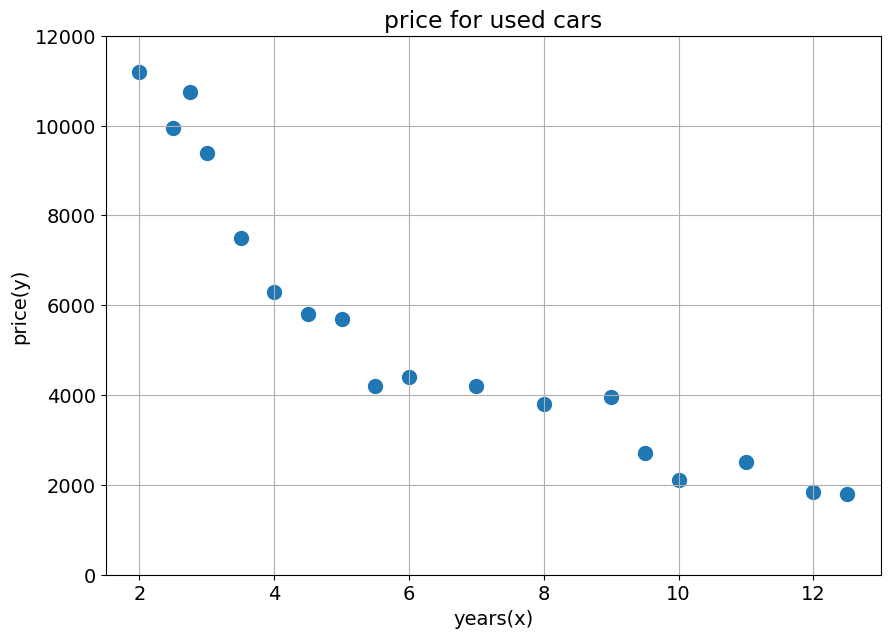

In [21]:
# Plot the training data
fig, ax = plt.subplots(figsize=(10, 7))
plt.scatter(xTrain, yTrain, s=100)

plt.rcParams.update({'font.size': 14})

ax.set_xlabel('years(x)')
ax.set_ylabel('price(y)')
ax.set_title('price for used cars')

ax.axis([1.5, 13, 0, 12000])
ax.grid(True)

<a name="toc_40291_2.2"></a>
##  Modeling Linear Regressions
To start, we have an example of how to create a basic regressions function with dregree = 1 using the ["polyfit"](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) and the ["poly1d"](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html) functions. Next, the mean error percentage is computed for the train data and the fitted function and the training data is plotted.

Mean error train:
24.58


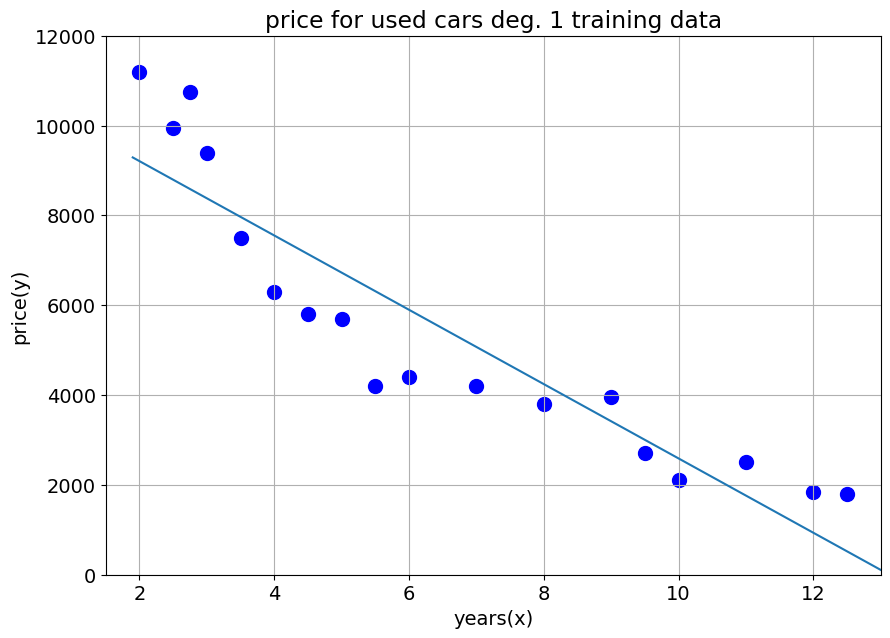

In [22]:
#polynomial fit with degree = 1
modeld1 = np.poly1d(np.polyfit(xTrain, yTrain, 1))
#mean error percentatge is computed for the train data
print("Mean error train:")

#MSE (mean ABSOLUTE error) % with train data
per1 = np.sum(np.abs(modeld1(xTrain)-yTrain)/yTrain)/len(yTrain)*100

print(round(per1,2))
# plot model and training data
plot_data(xTrain, yTrain, modeld1, "deg. 1 training data")

Sometimes a higher degree function give better results to our problems.

Define a new model with a polynomial function of degrees 2 and 4, and compare the results with the linear ones. **Which one is better?**

$\color{red}{\text{according to mean error (ME) printed below:
model 4 has lower ME than model 2. Hence, model 4 is a better model.}}$


Mean error train deg. 2:
14.207545998417812
Mean error train deg. 4:
8.809393580201247


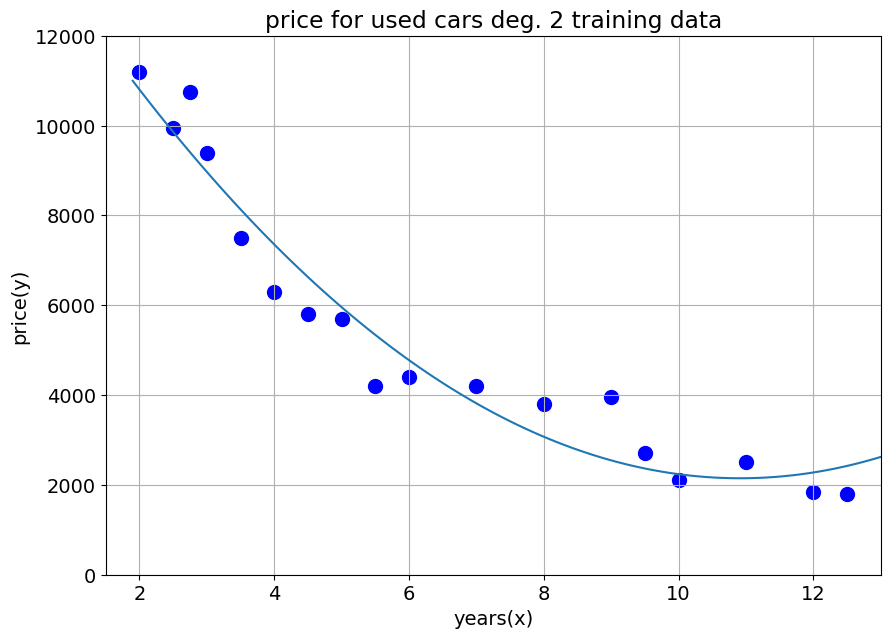

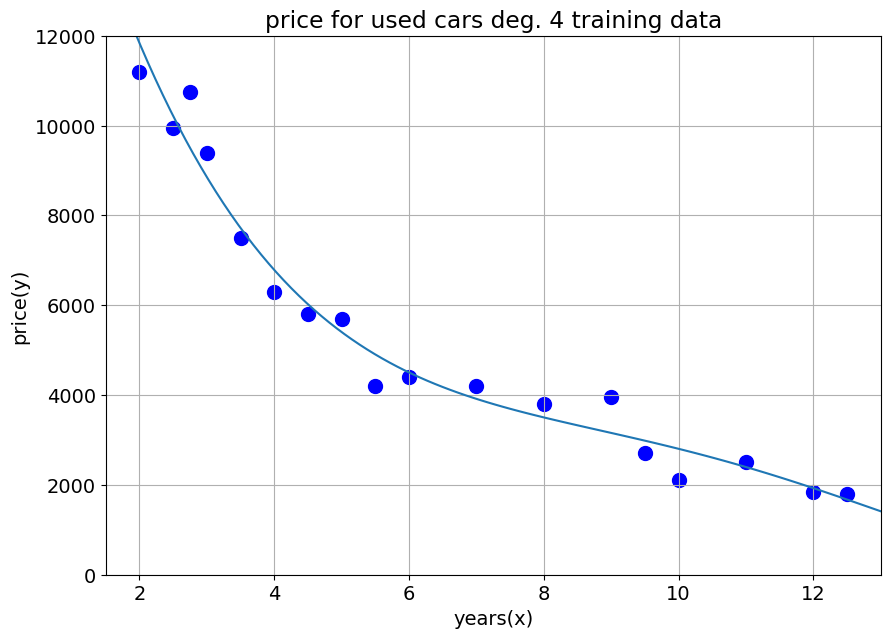

In [23]:
# TO DO: Define a new model with a polynomial function of degrees 2 and 4, and compare the results with the linear ones.

#polynomial fit with degree = 2
modeld2 = np.poly1d(np.polyfit(xTrain, yTrain, 2))  #__________TO DO__________

#mean error percentatge is computed for the train data
print("Mean error train deg. 2:")
per1 = np.sum(np.abs(modeld2(xTrain)-yTrain)/yTrain)/len(yTrain)*100  #__________TO DO__________
print(per1)

# plot model and training data
plot_data(xTrain, yTrain, modeld2, "deg. 2 training data")

#polynomial fit with degree = 4
modeld4 = np.poly1d(np.polyfit(xTrain, yTrain, 4))  #__________TO DO__________
#mean error percentatge is computed for the train data
print("Mean error train deg. 4:")
per2 = np.sum(np.abs(modeld4(xTrain)-yTrain)/yTrain)/len(yTrain)*100  #__________TO DO__________

print(per2)
# plot model and training data
plot_data(xTrain, yTrain, modeld4, "deg. 4 training data")

As we saw before, we have another dataset called "validation data" that allows us to further check which model is better for us. Compute the mean error percentage for the model with the validation data and compare them with the training data . **Now, which model do you think is better for our data? Is it the same as the one chosen before? Explain why.**

$\color{red}{\text{according to mean error (ME) for both train and valid data printed below. Model 2 has lower ME than any other model on valid data (unseen data). Hence, model 2 is a better model in terms of generalization through valid data than model 4 chosen before on previous calculations.}}$


Mean error train model deg 1:
24.58073942307833
Mean error test model deg 1:
25.17368105669305
Mean error train model deg 2:
14.207545998417812
Mean error test model deg 2:
9.982021272220376
Mean error train model deg 4:
8.809393580201247
Mean error test model deg 4:
12.30018037115111


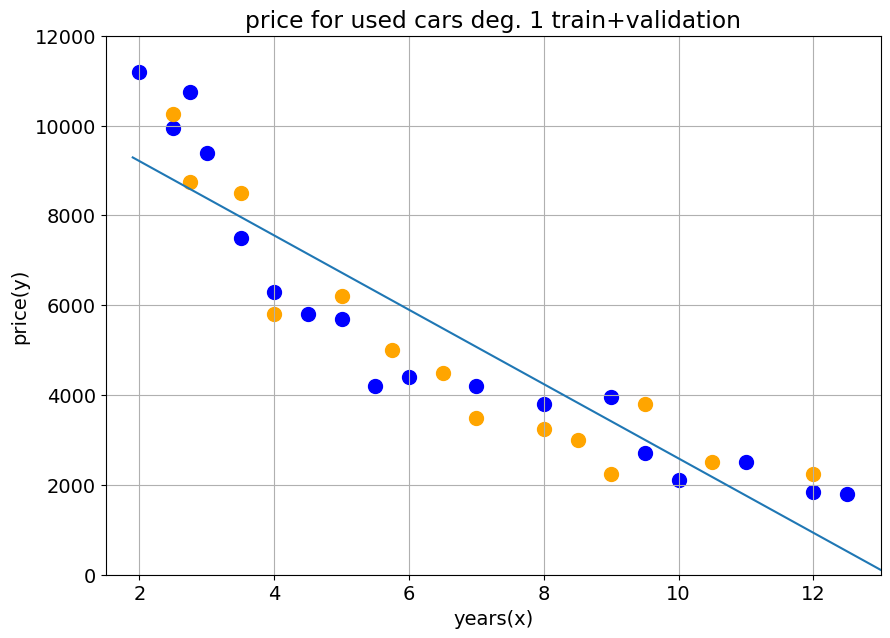

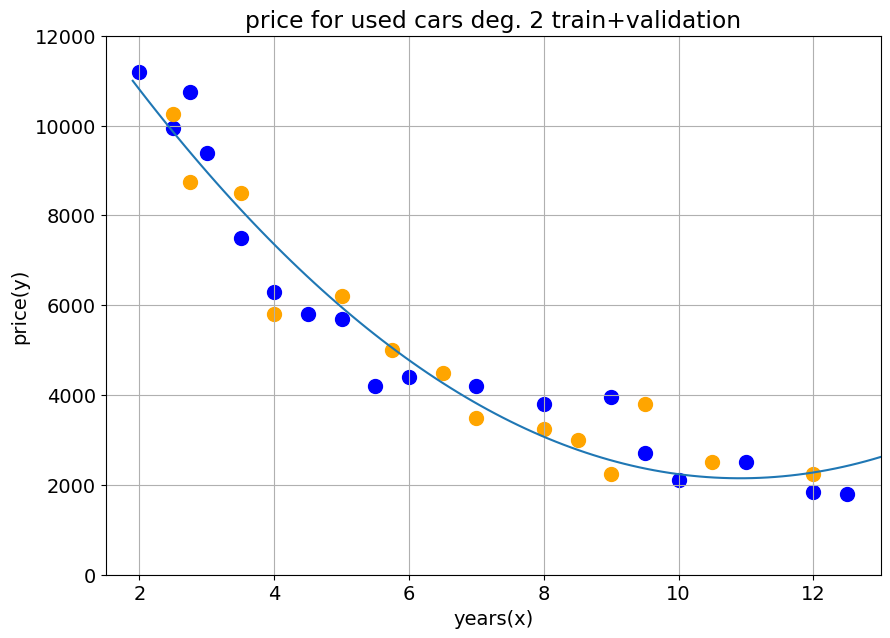

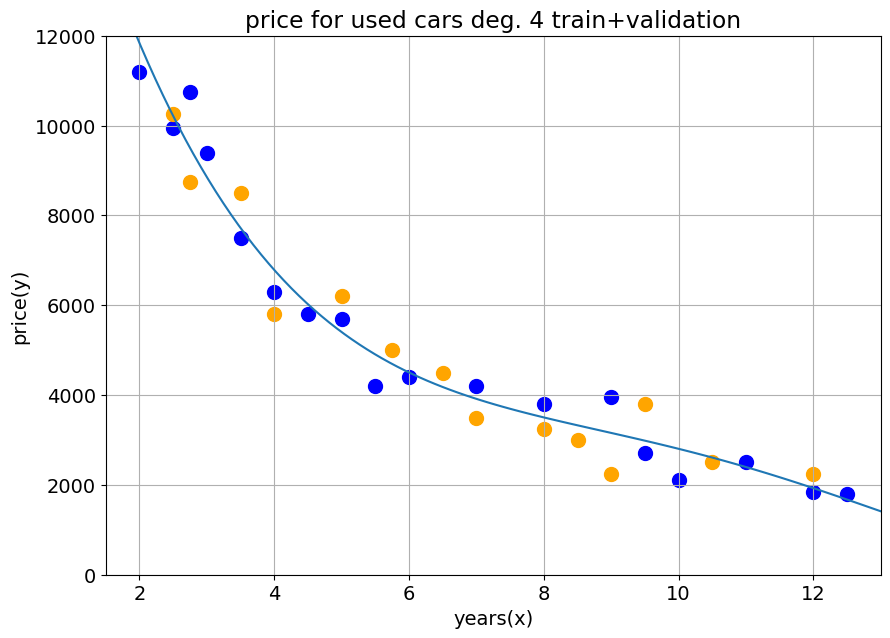

In [24]:
#mean error percentatge for model deg. 1 is computed for the train and validation data
print("Mean error train model deg 1:")
#__________TO DO__________
per1_train=np.sum(np.abs(modeld1(xTrain)-yTrain)/yTrain)/len(yTrain)*100
print(per1_train)
print("Mean error test model deg 1:")
#__________TO DO__________
per1_valid=np.sum(np.abs(modeld1(xVal)-yVal)/yVal)/len(yVal)*100
print(per1_valid)

# plot model and training data
plot_data(xTrain, yTrain, modeld1, "deg. 1 train+validation", xVal, yVal, True)

#mean error percentatge for model deg. 2 is computed for the train and validation data
print("Mean error train model deg 2:")
#__________TO DO__________
per2_train=np.sum(np.abs(modeld2(xTrain)-yTrain)/yTrain)/len(yTrain)*100
print(per2_train)
print("Mean error test model deg 2:")
#__________TO DO__________
per2_valid=np.sum(np.abs(modeld2(xVal)-yVal)/yVal)/len(yVal)*100
print(per2_valid)

# plot model and training data
plot_data(xTrain, yTrain, modeld2, "deg. 2 train+validation", xVal, yVal, True)

#mean error percentatge for model deg. 4 is computed for the train and validation data
print("Mean error train model deg 4:")
#__________TO DO__________
per3_train=np.sum(np.abs(modeld4(xTrain)-yTrain)/yTrain)/len(yTrain)*100
print(per3_train)
print("Mean error test model deg 4:")
#__________TO DO__________
per3_valid=np.sum(np.abs(modeld4(xVal)-yVal)/yVal)/len(yVal)*100
print(per3_valid)

# plot model and training data
plot_data(xTrain, yTrain, modeld4, "deg. 4 train+validation", xVal, yVal, True)

In reality, when running Gradient Descent, your loss is computed as the Mean Squared Error.
1. Import the function "mean_squared_error" from the library "sklearn.metrics"
2. Create a FOR loop that trains models from degree 1 to degree 14
3. Plot the model at every iteration, and compute de MSE for train and for validation. Store them in two vectors "TrainMSE" and "ValMSE".


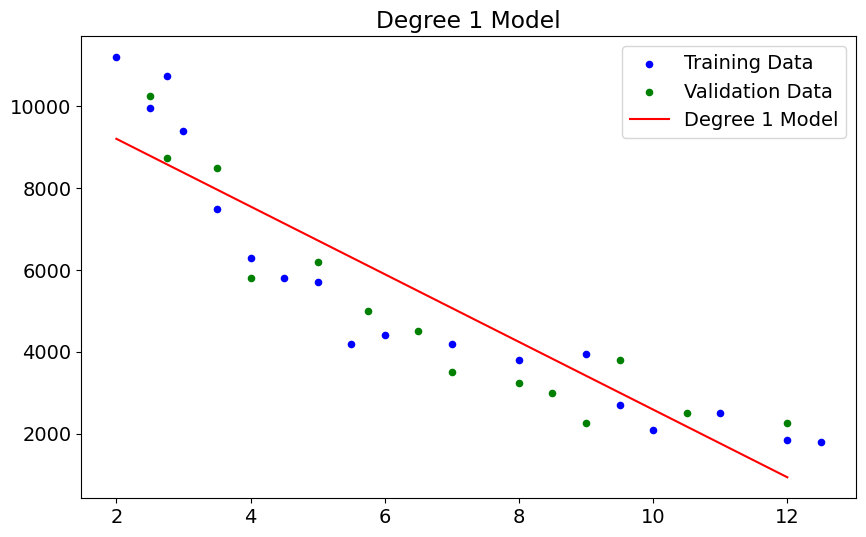

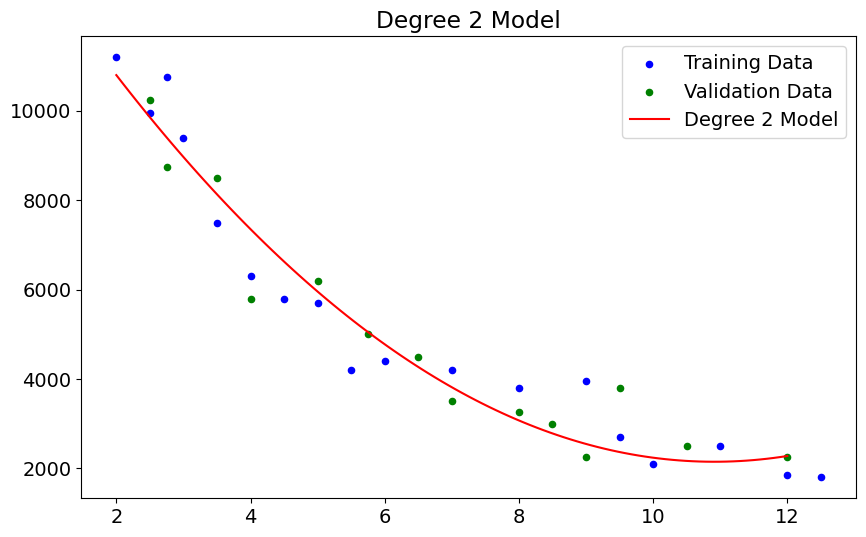

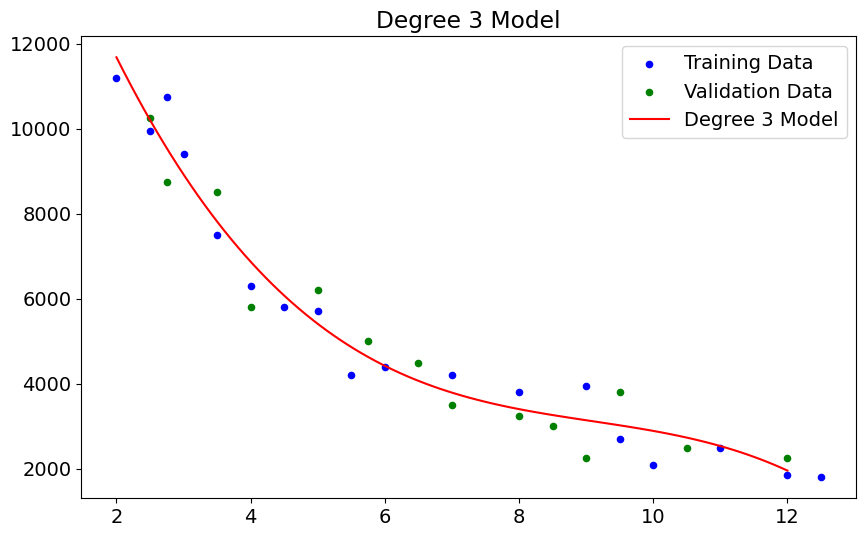

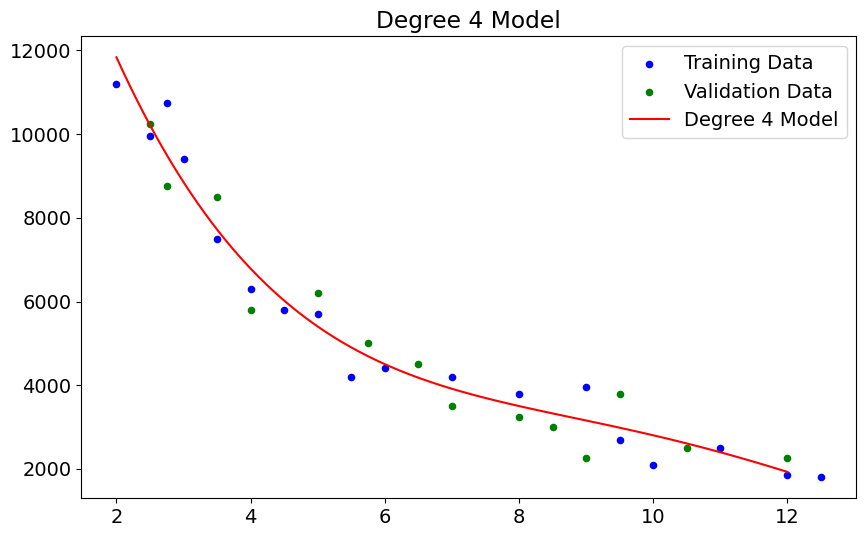

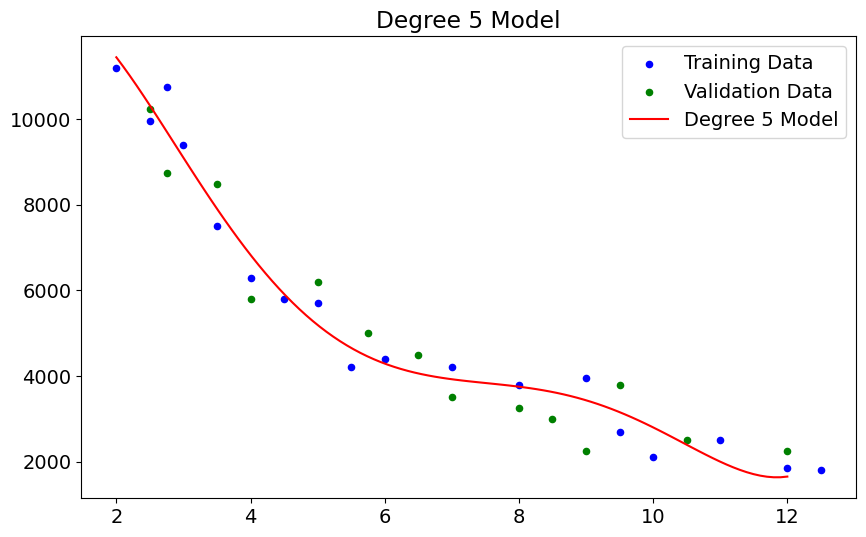

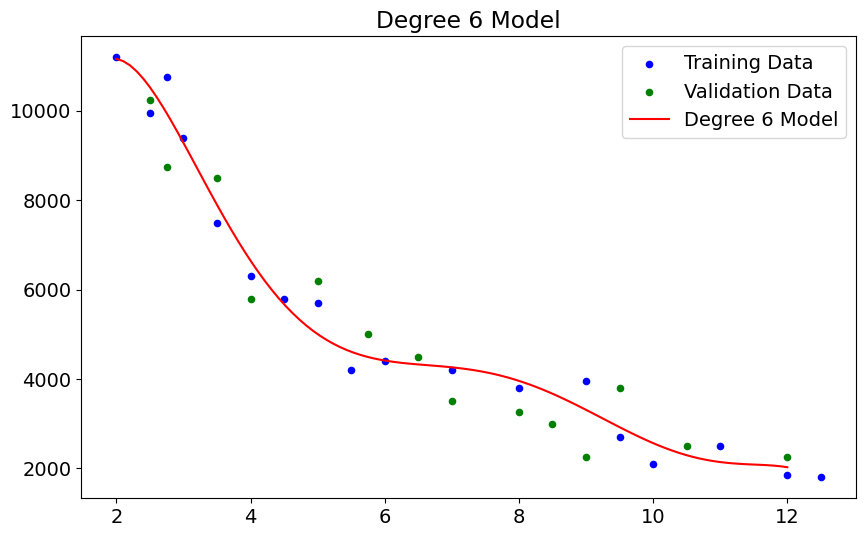

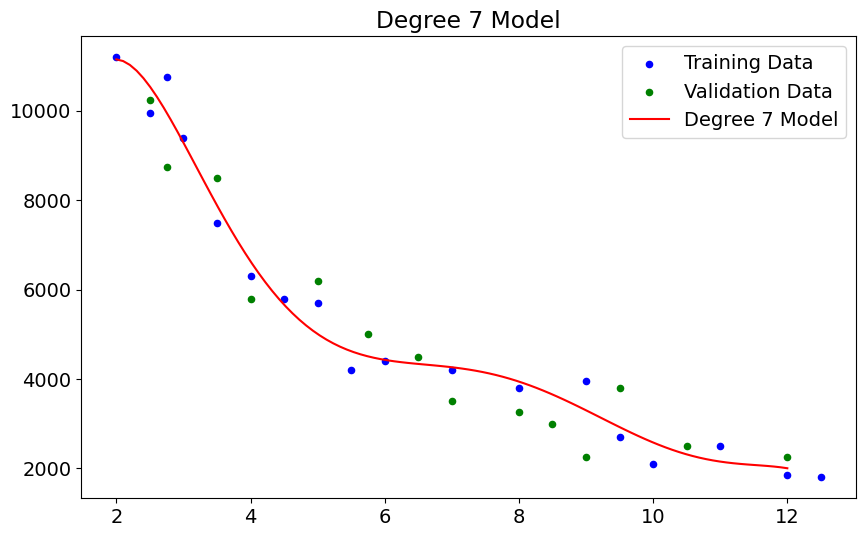

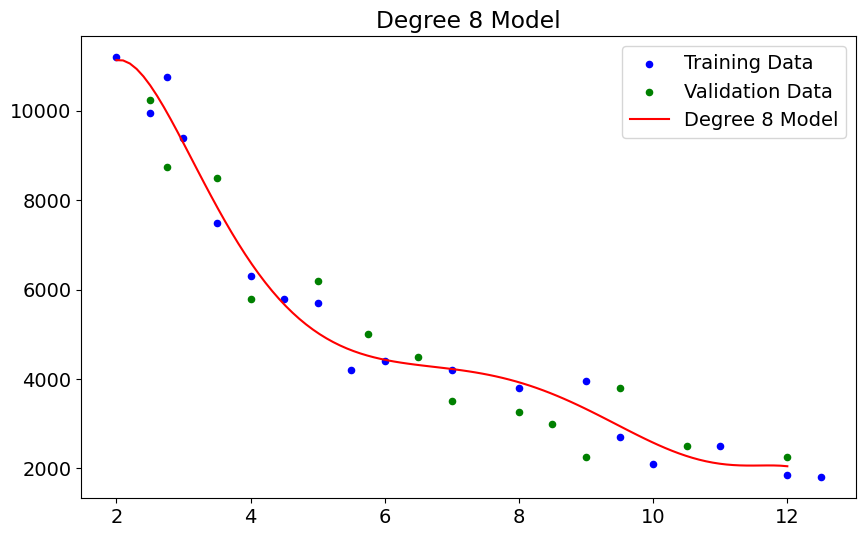

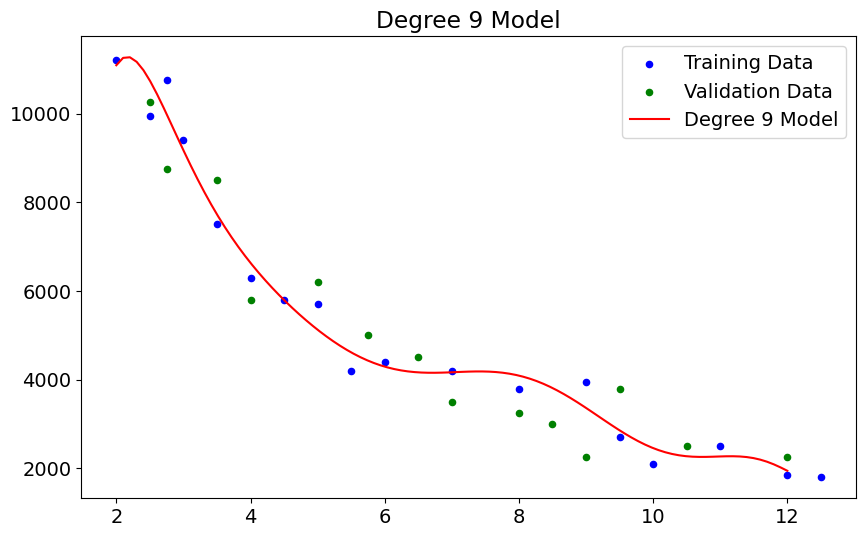

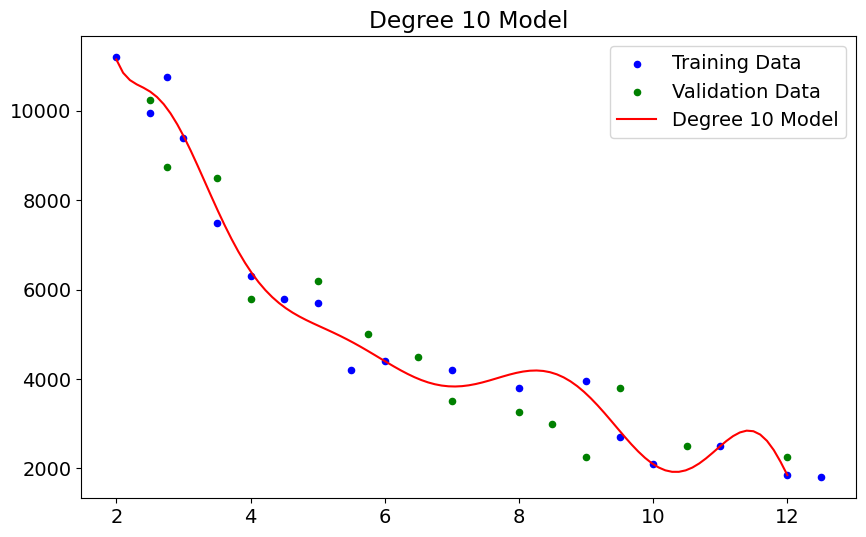

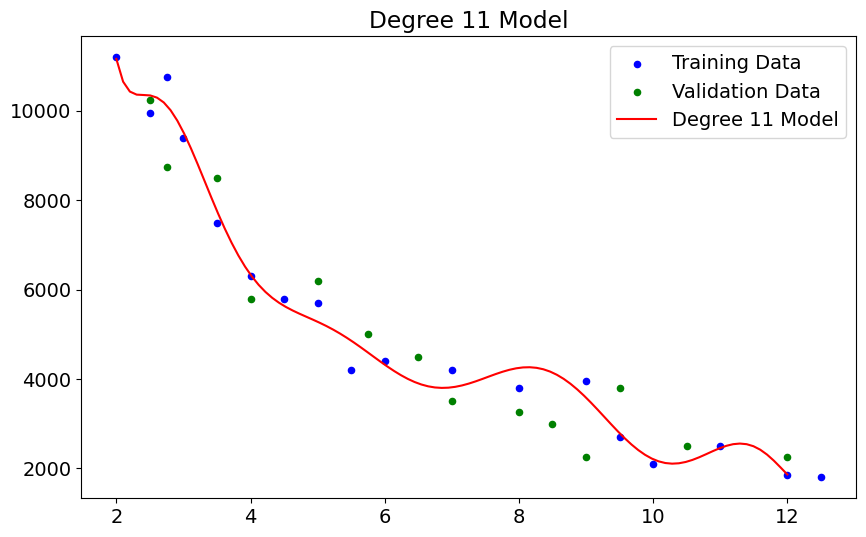

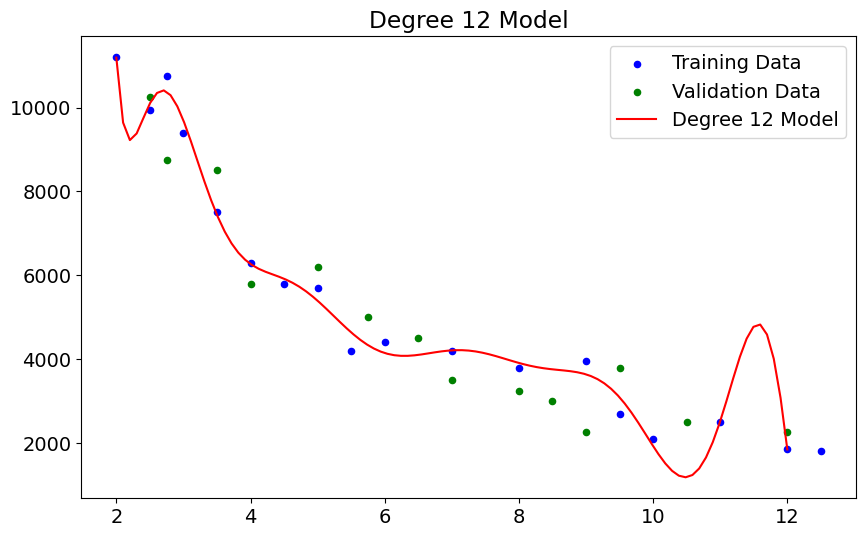

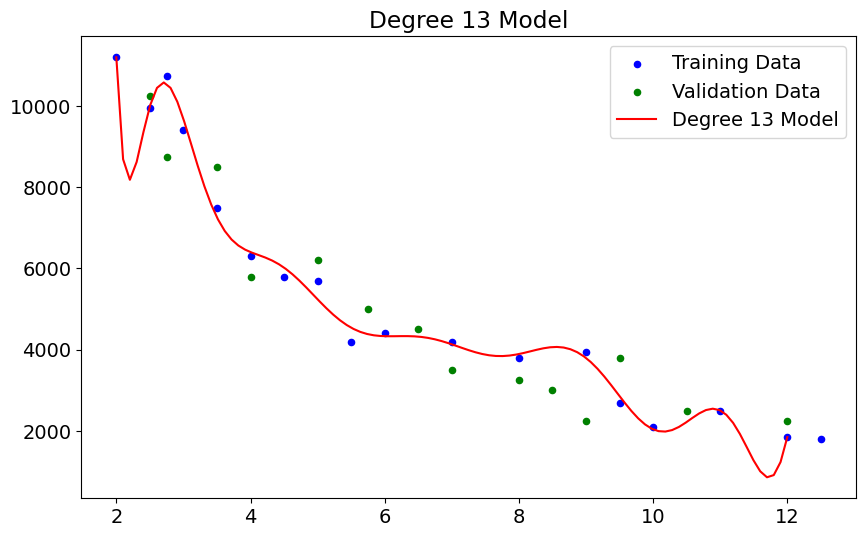

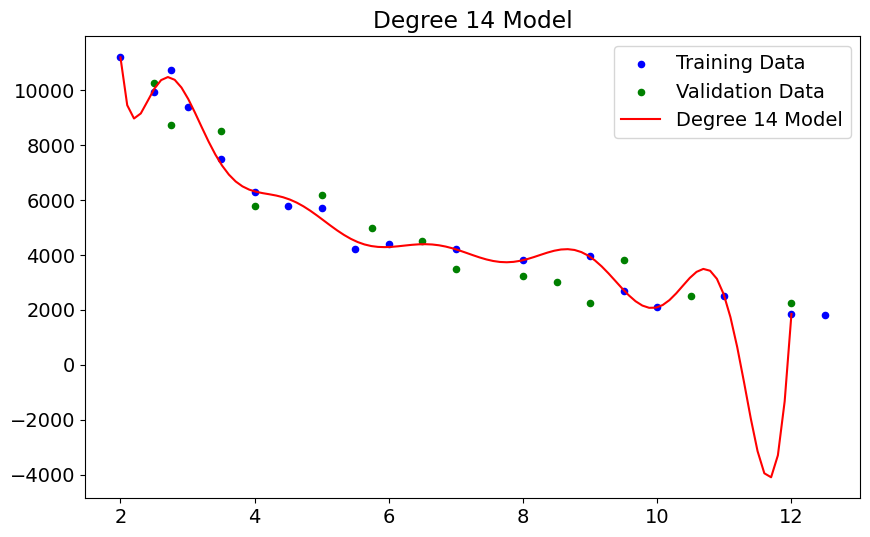

In [25]:
# Import library
#__________TO DO__________
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# For loop
#__________TO DO__________
TrainMSE = []
ValMSE = []

# Create a FOR loop that trains models from degree 1 to degree 14
# Plot the model at every iteration, and compute de MSE for train and for validation. Store them in two vectors "TrainMSE" and "ValMSE".
degrees = range(1, 15)

for degree in degrees:
    model = np.poly1d(np.polyfit(xTrain, yTrain, degree))

    yTrain_pred = model(xTrain)
    yVal_pred = model(xVal)

    # compute MSE(val and train)
    mse_train = mean_squared_error(yTrain, yTrain_pred)
    mse_val = mean_squared_error(yVal, yVal_pred)

    TrainMSE.append(mse_train)
    ValMSE.append(mse_val)

    # plot
    plt.figure(figsize=(10, 6))
    plt.scatter(xTrain, yTrain, label="Training Data", c='b', s=20)
    plt.scatter(xVal, yVal, label="Validation Data", c='g', s=20)

    # 100 evenly spaced values within rnage
    x_range = np.linspace(min(xTrain), max(xVal), 100)

    plt.plot(x_range, model(x_range), 'r', label=f'Degree {degree} Model')
    plt.legend()
    plt.title(f'Degree {degree} Model')
    plt.show()

Plot "TrainMSE" and "ValMSE" for every degree of polynomial. **What would be the best model? Explain why**

$\color{red}{\text{from the printed values & graph below:
Model with 3 degree of polynomial has the lowest validation MSE value after which the MSE increases for
other models in range.
}}$


In [26]:
ValMSE

[1139035.1781437532,
 406056.4255161988,
 350732.4718125762,
 351929.99004613905,
 490565.5840571059,
 559819.6906721198,
 555035.8328522575,
 551504.126946234,
 623854.3729493963,
 686784.5470355384,
 683898.1535111947,
 794175.4795480983,
 859041.1620981051,
 911188.8054096492]

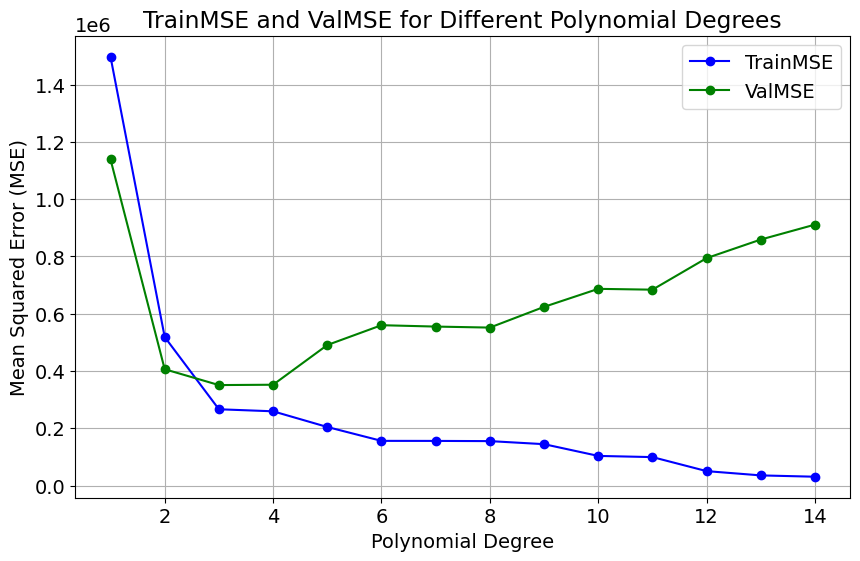

In [27]:
# Plot TrainMSE and ValMSE to compare the fitted models computed above
#__________TO DO__________

plt.figure(figsize=(10, 6))
plt.plot(degrees, TrainMSE, marker='o', label="TrainMSE", color='b')
plt.plot(degrees, ValMSE, marker='o', label="ValMSE", color='g')
plt.title("TrainMSE and ValMSE for Different Polynomial Degrees")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid(True)
plt.show()

Submit this notebook by the lab deadline, with the cells executed and including your **answers** in the text fields in $\color{red}{\text{red}}$ color.